In [18]:
!pip install tensorflow


Exception ignored in: <function _xla_gc_callback at 0x7badc2a14d60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


In [19]:
import numpy as np
import pandas as pd

In [20]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [21]:
db = pd.read_csv(url,sep=";")

db.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
import tensorflow as tf


In [23]:
train_db = db.sample(frac=0.75, random_state=4)
val_db = db.drop(train_db.index)


In [24]:
max_val = train_db.max(axis= 0)
min_val = train_db.min(axis= 0)

range = max_val - min_val
train_df = (train_db - min_val)/(range)

val_df =  (val_db- min_val)/range

In [25]:
X_train = train_db.drop('quality',axis=1)
X_val = val_db.drop('quality',axis=1)
y_train = train_db['quality'] - 3
y_val = val_db['quality'] - 3

In [26]:
input_shape = [X_train.shape[1]]

input_shape

[11]

Create Model Neural Network


In [27]:
# Create a linear Model
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

Create Multitlayered Neural Network


In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dropout(0.2),  # helps generalize
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes in Wine dataset
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

Trainning Model

In [42]:
losses = model.fit(X_train, y_train,

                   validation_data=(X_val, y_val),
                   epochs=20,

                   )

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5099 - sparse_categorical_accuracy: 0.3471 - val_loss: 1.2337 - val_sparse_categorical_accuracy: 0.4725
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1774 - sparse_categorical_accuracy: 0.4921 - val_loss: 1.1546 - val_sparse_categorical_accuracy: 0.4725
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2147 - sparse_categorical_accuracy: 0.4889 - val_loss: 1.1813 - val_sparse_categorical_accuracy: 0.4775
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1657 - sparse_categorical_accuracy: 0.5320 - val_loss: 1.1678 - val_sparse_categorical_accuracy: 0.5050
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1115 - sparse_categorical_accuracy: 0.4894 - val_loss: 1.2033 - val_sparse_categorical_accuracy: 0.4600
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1557 - sparse_categorical_accuracy: 0.4964 - val_loss: 1.1801 - val_sparse_categorical_accuracy: 0.4950
Epoch 7/20
38/38

Generate Prediction & Analyze Accuracy

In [43]:
model.predict(X_val.iloc[0:3, :])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[0.00441111, 0.03845155, 0.60351753, 0.3123238 , 0.03697202,
        0.00432395],
       [0.00170834, 0.03781804, 0.7612299 , 0.10200973, 0.09503724,
        0.00219678],
       [0.00192934, 0.0271397 , 0.67674106, 0.26816267, 0.02341819,
        0.00260907]], dtype=float32)

In [44]:
y_val.iloc[0:3]


,quality
0,2
9,2
12,2


In [45]:
loss_df = pd.DataFrame(losses.history)


<Axes: >

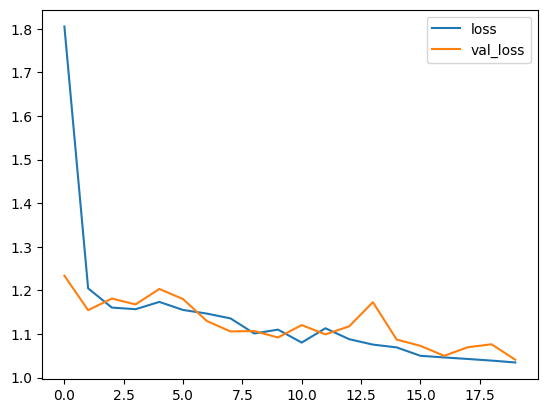

In [46]:
loss_df.loc[:,['loss','val_loss']].plot()
